In [3]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
import os
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file = '/content/drive/My Drive/AIMLDataContent/SVHN_single_grey1.h5'

In [0]:
# Open the file as readonly
h5f = h5py.File(file, 'r')

In [9]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [10]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


In [0]:
# change the dtype to 'float64' 
import numpy as np
X_train = np.array(X_train).astype('float32')
X_val = np.array(X_val).astype('float32')
X_test = np.array(X_test).astype('float32')

In [13]:
y_train.dtype

dtype('uint8')

In [0]:
y_train_nrm = tf.keras.utils.to_categorical(y_train, num_classes=10,dtype='float32')
y_val_nrm = tf.keras.utils.to_categorical(y_val, num_classes=10,dtype='float32')
y_test_nrm = tf.keras.utils.to_categorical(y_test, num_classes=10,dtype='float32')

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


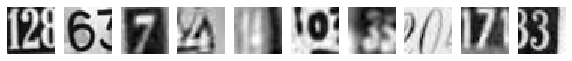

In [16]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train_nrm[0:10][i])))
plt.show()

Initialize model, reshape & normalize data, let's prepare first model with adam optimizer and cross_entropy loss function

In [0]:
tf.keras.backend.clear_session()
#Initialize model
model1 = tf.keras.models.Sequential()
#Reshape data
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
#normalize data
model1.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.25))


#Add 2nd hidden layer
model1.add(tf.keras.layers.Dense(100, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Training the model and check accuracy on validation data
model1.fit(X_train,y_train_nrm, validation_data=(X_val,y_val_nrm), epochs=10, batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 12s 274us/sample - loss: 1.7149 - accuracy: 0.4201 - val_loss: 1.1367 - val_accuracy: 0.6518
Epoch 2/10
42000/42000 [==============================] - 11s 250us/sample - loss: 1.2789 - accuracy: 0.5891 - val_loss: 0.9404 - val_accuracy: 0.7181
Epoch 3/10
42000/42000 [==============================] - 11s 255us/sample - loss: 1.1410 - accuracy: 0.6377 - val_loss: 0.8136 - val_accuracy: 0.7563
Epoch 4/10
42000/42000 [==============================] - 10s 248us/sample - loss: 1.0587 - accuracy: 0.6644 - val_loss: 0.7482 - val_accuracy: 0.7759
Epoch 5/10
42000/42000 [==============================] - 10s 246us/sample - loss: 0.9907 - accuracy: 0.6858 - val_loss: 0.7269 - val_accuracy: 0.7804
Epoch 6/10
42000/42000 [==============================] - 10s 247us/sample - loss: 0.9519 - accuracy: 0.6981 - val_loss: 0.6601 - val_accuracy: 0.8069
Epoch 7/10
42000/42000 [====================

In [22]:
print(model1.evaluate(X_train, y_train_nrm, verbose=0))
print(model1.evaluate(X_test, y_test_nrm, verbose=0))

[0.5592829037110011, 0.83138096]
[0.6333568487962087, 0.8128333]


Initialize model, reshape & normalize data, let's prepare first model with sgd optimizer and mean_squared_error loss function

In [0]:
tf.keras.backend.clear_session()
#Initialize model
model2 = tf.keras.models.Sequential()
#Reshape data
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
#normalize data
model2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.25))


#Add 2nd hidden layer
model2.add(tf.keras.layers.Dense(100, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
sgd = tf.keras.optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.5, nesterov=True)
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
#model2.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

In [27]:
#Training the model on validation data
model2.fit(X_train,y_train_nrm, validation_data=(X_val,y_val_nrm), epochs=10, batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 251us/sample - loss: 1.6719 - accuracy: 0.4281 - val_loss: 1.0869 - val_accuracy: 0.6667
Epoch 2/10
42000/42000 [==============================] - 10s 240us/sample - loss: 1.2467 - accuracy: 0.5970 - val_loss: 0.9038 - val_accuracy: 0.7325
Epoch 3/10
42000/42000 [==============================] - 10s 236us/sample - loss: 1.1444 - accuracy: 0.6360 - val_loss: 0.8351 - val_accuracy: 0.7541
Epoch 4/10
42000/42000 [==============================] - 10s 237us/sample - loss: 1.0580 - accuracy: 0.6640 - val_loss: 0.7579 - val_accuracy: 0.7772
Epoch 5/10
42000/42000 [==============================] - 10s 235us/sample - loss: 1.0050 - accuracy: 0.6818 - val_loss: 0.7329 - val_accuracy: 0.7836
Epoch 6/10
42000/42000 [==============================] - 10s 234us/sample - loss: 0.9645 - accuracy: 0.6956 - val_loss: 0.6716 - val_accuracy: 0.8004
Epoch 7/10
42000/42000 [====================

In [28]:
print(model2.evaluate(X_train, y_train_nrm, verbose=0))
print(model2.evaluate(X_test, y_test_nrm, verbose=0))

[0.5983076011453357, 0.8257381]
[0.6747868874867757, 0.80255556]


Let's prepare a neural network with convolutional layers

In [0]:
tf.keras.backend.clear_session()
#Initialize model
model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.Reshape((32,32,1),input_shape=(32,32,)))
#normalize data
model3.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model3.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(4,4), #Size of the filter
                                 activation='relu'))


#Add second convolutional layer
model3.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add another dropout layer
model3.add(tf.keras.layers.Dropout(0.25))

#Add MaxPooling layer
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model3.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model3.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model3.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
#Train the model on validation data
model3.fit(X_train,y_train_nrm, validation_data=(X_val,y_val_nrm), epochs=10, batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 185s 4ms/sample - loss: 0.6569 - accuracy: 0.8019 - val_loss: 0.3986 - val_accuracy: 0.8900
Epoch 2/10
42000/42000 [==============================] - 184s 4ms/sample - loss: 0.3509 - accuracy: 0.8954 - val_loss: 0.2997 - val_accuracy: 0.9154
Epoch 3/10
42000/42000 [==============================] - 184s 4ms/sample - loss: 0.2566 - accuracy: 0.9222 - val_loss: 0.2445 - val_accuracy: 0.9344
Epoch 4/10
42000/42000 [==============================] - 185s 4ms/sample - loss: 0.1889 - accuracy: 0.9415 - val_loss: 0.2201 - val_accuracy: 0.9401
Epoch 5/10
42000/42000 [==============================] - 185s 4ms/sample - loss: 0.1435 - accuracy: 0.9551 - val_loss: 0.1942 - val_accuracy: 0.9477
Epoch 6/10
42000/42000 [==============================] - 185s 4ms/sample - loss: 0.1110 - accuracy: 0.9645 - val_loss: 0.1877 - val_accuracy: 0.9526
Epoch 7/10
42000/42000 [==========================

In [58]:
print(model3.evaluate(X_train, y_train_nrm, verbose=0))
print(model3.evaluate(X_test, y_test_nrm, verbose=0))

[0.03408559361432812, 0.99009526]
[0.5632930407424768, 0.8955]


Results from model3 which is a CNN implies a great accuracy rate with train data but accuracy rate of test data is less then training data, however, comparing all three models above it appears that CNN is still the best suited model for solving the purpose.

In [0]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [0]:
predictions = model3.predict(X_test)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

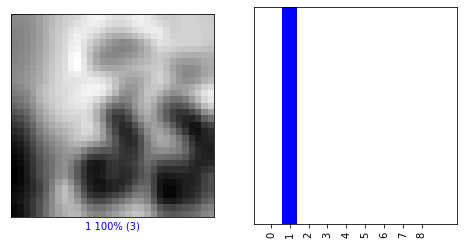

In [32]:
#Replace value of i with other index to check the image number
i = 6
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, X_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()